In [1]:
from plotly.offline import init_notebook_mode
import plotly.io as pio
import plotly.express as px
import pandas as pd
import numpy as np

init_notebook_mode(connected=True)
pio.renderers.default = "plotly_mimetype+notebook"

In [2]:
file_path = r"C:\Users\User\Downloads\avia_gooc_page_spreadsheet.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=10, index_col=0)
df.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df)


                                                 2013        2014        2015  \
TIME                                                                            
European Union - 27 countries (from 2020)    11348327  12377851.1  12524664.1   
European Union - 28 countries (2013-2020)  13397441.4    14453820  14583689.7   
European Union - 27 countries (2007-2013)  13393476.4  14449460.3  14579764.3   
Belgium                                      957012.2   1014585.6   1126234.1   
Bulgaria                                      19574.9     23072.8       31520   
Czechia                                         58147       58312       58445   
Denmark                                        148980      208590      210570   
Germany                                     4231473.9     4336163     4325665   
Estonia                                         20862       19432       16034   
Ireland                                      127422.8    138202.9    148713.5   
Greece                      

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [3]:
print(df.columns)
print(df.index)

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')
Index(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)',
       'European Union - 27 countries (2007-2013)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania',
       'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Poland',
       'Portugal', 'Romania', 'Slovenia', 'Slovakia', 'Finland', 'Sweden',
       'Iceland', 'Norway', 'Switzerland', 'United Kingdom',
       'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia', 'Serbia',
       'Türkiye'],
      dtype='object', name='TIME')


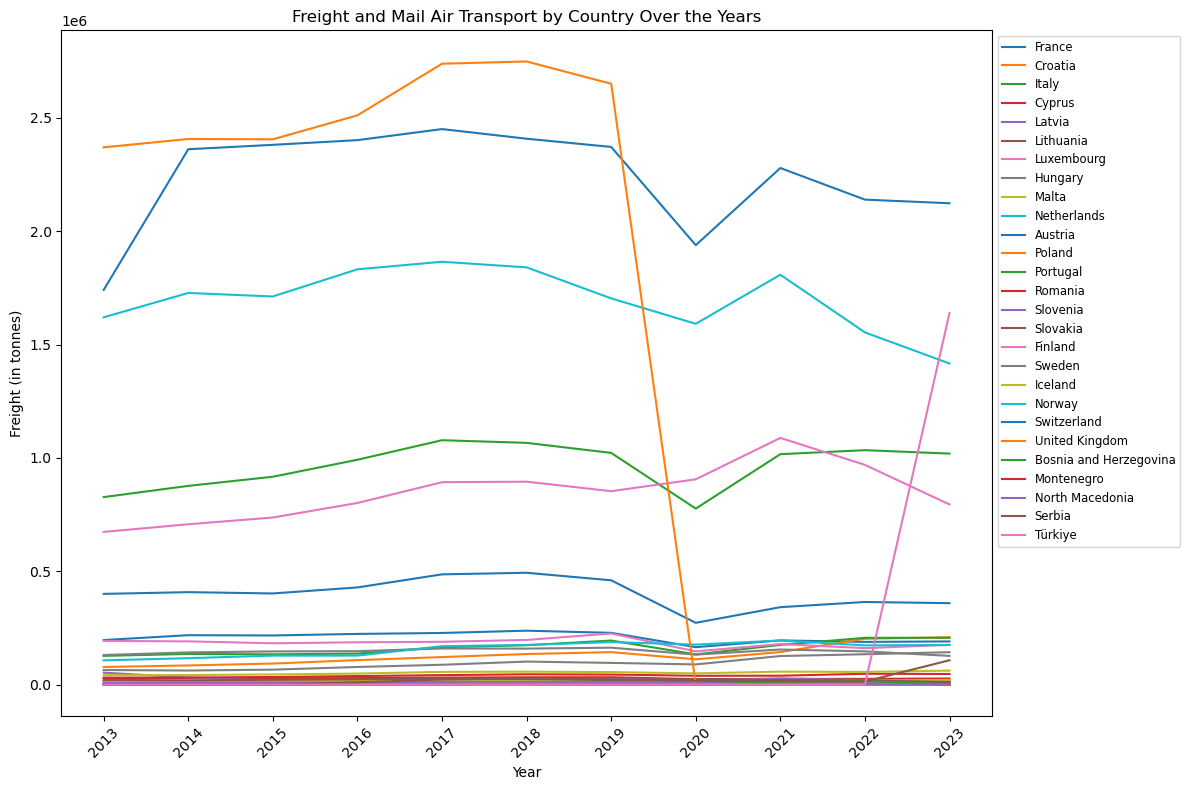

In [7]:
import matplotlib.pyplot as plt


df = df.drop(df.index[0:3])


df.fillna(0, inplace=True)  
x = df.columns  
y_labels = df.index  


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df.loc[country].values 
    ax.plot(x, y_values, label=country)


ax.set_title("Freight and Mail Air Transport by Country Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
file_path = r"C:\Users\User\Downloads\avia_gooc_page_spreadsheet (5countries).xlsx"
df_actual = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=10, index_col=0)
df_actual.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_actual)

                  2013       2014       2015       2016       2017       2018  \
TIME                                                                            
Belgium       957012.2  1014585.6  1126234.1  1088734.0  1251173.0  1416428.0   
Germany      4231473.9  4336163.0  4325665.0  4467022.0  4773359.0  4842716.0   
France       1741020.6  2361510.1  2380931.3  2401593.0  2450326.1  2407878.2   
Netherlands  1620037.6  1727454.8  1712031.3  1831791.8  1865105.5  1840418.8   
Italy           826981   876495.0   916755.0   991688.0  1077874.0  1066221.0   

                  2019       2020       2021       2022       2023  
TIME                                                                
Belgium      1397513.0  1584640.0  2083632.0  1729332.0  1519106.0  
Germany      4684570.8  4497805.1  5289724.0  4938859.1  4592645.6  
France       2371614.1  1938349.0  2278630.1  2139178.3  2123148.6  
Netherlands  1703556.1  1591388.6  1807924.4  1553481.8  1416215.3  
Italy        10219

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [10]:
print(df.columns)
print(df.index)

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')
Index(['Belgium', 'Germany', 'France', 'Netherlands', 'Italy'], dtype='object', name='TIME')


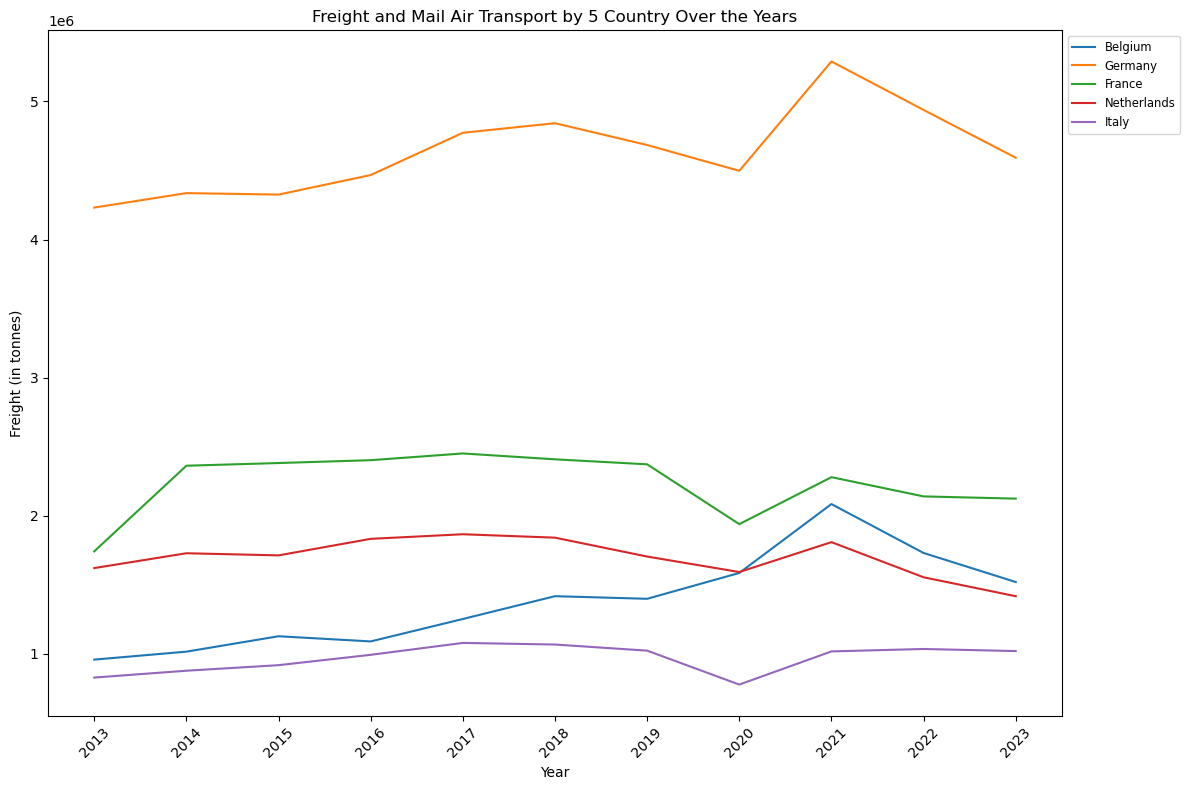

In [11]:
import matplotlib.pyplot as plt


df.fillna(0, inplace=True)  
x = df.columns  
y_labels = df.index  


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df.loc[country].values 
    ax.plot(x, y_values, label=country)


ax.set_title("Freight and Mail Air Transport by 5 Country Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
file_path = r"C:\Users\User\Downloads\avia_goincc_page_spreadsheet.xlsx"
df_intraeu = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=9, index_col=0)
df_intraeu.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_intraeu)

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



              2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1   2019-Q2  \
TIME                                                                      
Belgium         82510   87402.0   87429.0   82495.0   77597.0   82147.0   
Germany        227691  232631.0  217166.0  239209.0  222887.4  226274.4   
Italy           64252   70344.0   62750.0   68234.0   59357.0   64335.0   
Netherlands   13407.1   13778.1   12753.8   14476.0   14328.6   14060.5   
France       104423.9  108247.1   98472.6  116019.8  113108.8  113747.8   

              2019-Q3   2019-Q4   2020-Q1   2020-Q2   2020-Q3   2020-Q4  \
TIME                                                                      
Belgium       79818.0   86013.0   76958.0   71194.0   88415.0   97570.0   
Germany      220484.3  238120.2  211696.3  200809.1  227920.5  261307.1   
Italy         63627.0   74414.0   62850.0   53269.0   65015.0   78770.0   
Netherlands   15403.1   18764.3   16170.7    9199.6   11502.2   11217.6   
France       112286.3  1

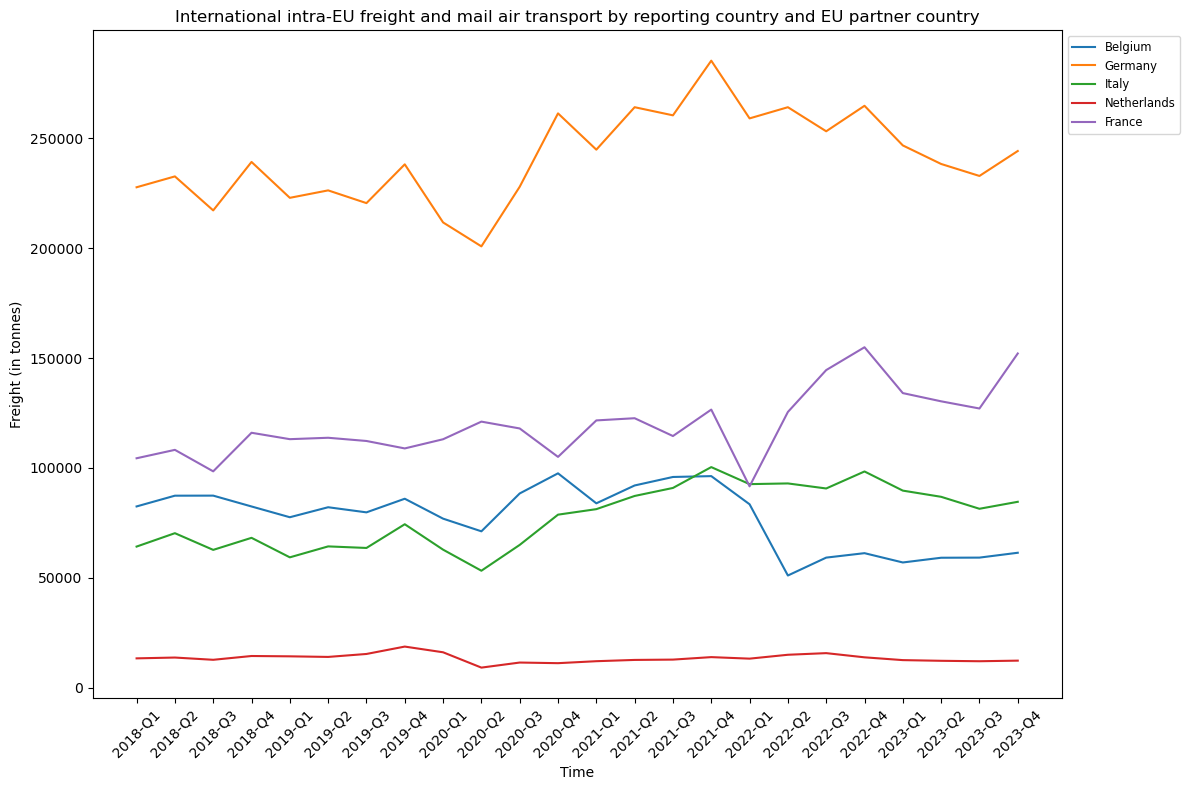

In [29]:
import matplotlib.pyplot as plt


df_intraeu.fillna(0, inplace=True)  
x = df_intraeu.columns[0:-2]  
y_labels = df_intraeu.index


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_intraeu.loc[country].values[0:-2] 
    ax.plot(x, y_values, label=country)


ax.set_title("International intra-EU freight and mail air transport by reporting country and EU partner country")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
file_path = r"C:\Users\User\Downloads\avia_goexcc_page_spreadsheet.xlsx"
df_extraeu = pd.read_excel(file_path, sheet_name='Sheet 1', skiprows=9, index_col=0)
df_extraeu.dropna(how='any', inplace=True)

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

print(df_extraeu)

              2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1   2019-Q2  \
TIME                                                                      
Belgium        252305  283463.0  268940.0  271661.0  251385.0  235845.0   
Germany        917174  955238.0  935424.0  987187.0  893838.1  911854.9   
France       424153.3  447476.0  445362.9  476781.4  431853.3  433495.7   
Italy          175891  196492.0  188485.0  190046.0  162586.0  183893.0   
Netherlands    428910  438921.7  451616.0  465788.5  405717.9  405950.6   

              2019-Q3   2019-Q4   2020-Q1   2020-Q2   2020-Q3   2020-Q4  \
TIME                                                                      
Belgium      254341.0  330009.0  251061.0  291513.0  323295.0  384528.0   
Germany      898433.0  945656.3  821575.4  810834.5  847428.7  986344.2   
France       426298.1  432303.8  436101.3  245226.7  298407.6  349894.5   
Italy        174564.0  188116.0  127543.0   90758.0  108417.0  141656.0   
Netherlands  403284.5  4

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



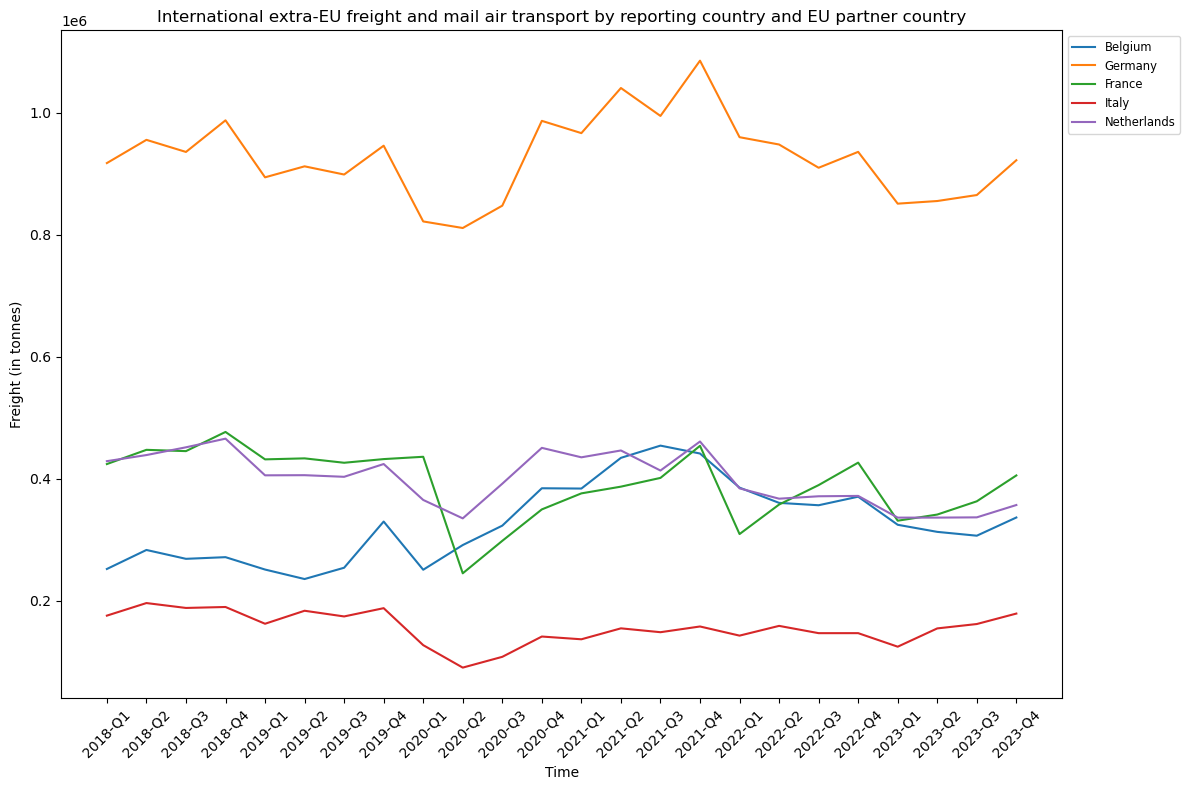

In [38]:
import matplotlib.pyplot as plt


df_extraeu.fillna(0, inplace=True)  
x = df_extraeu.columns
y_labels = df_extraeu.index


fig, ax = plt.subplots(figsize=(12, 8))


for country in y_labels:
    y_values = df_extraeu.loc[country].values
    ax.plot(x, y_values, label=country)


ax.set_title("International extra-EU freight and mail air transport by reporting country and EU partner country")
ax.set_xlabel("Time")
ax.set_ylabel("Freight (in tonnes)")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()